## Variation of k-Means: Kernelized k-Means

In [82]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt

Recall how kernels is a more efficient way for model calculations through the computation of inner products. Please read through the below paper to understand how kernelized k-Means work, particularly focusing on the update step. Below is a FLAWED implementation of kernelized k-Means. Please locate the bugs and correct them so that the function works as intended.

Link to paper: https://www.cs.utexas.edu/users/inderjit/public_papers/kdd_spectral_kernelkmeans.pdf

In [90]:
def k_means_kernelized(data, k, max_iter = 1000, weights = None, kernel_type = "linear"):
  n = len(data)
  # Randomize initial clusters
  random_state = check_random_state(None)
  labels = np.random.randint(k, size = n)

  # Initialize kernel
  kernel = pairwise_kernels(data, None, kernel_type)
  
  # Set weights if not defined to be all 1s (no preference)
  if not weights:
    weights = np.ones(n)

  # Inter/Intra Cluster distance storage
  intra_dist = np.zeros((n, k))
  inter_dist = np.zeros(k)
  
  for i in range(max_iter):
    intra_dist.fill(0)
    for cluster in range(k):
      # This is our mask to isolate the points currently in cluster j
      cluster_points = labels == cluster

      # If k is too large, we may have empty clusters!
      if np.sum(cluster_points) == 0:
        return "Empty cluster!"

      size = np.count_nonzero(cluster_points)
      cluster_kernel = kernel[cluster_points][:, cluster_points]

      # This is our distance update step using the kernel trick!
      this_cluster_dist = np.sum(np.outer(weights[cluster_points], weights[cluster_points]) * cluster_kernel / size ** 2)
      inter_dist[cluster] = this_cluster_dist
        
      # Update step
      intra_dist[:, cluster] += this_cluster_dist 
      intra_dist[:, cluster] -= 2 * np.sum(weights[cluster_points] * kernel[:, cluster_points], axis = 1) / size

    # If none of the labels were updated, we are done.  
    previous_labels = labels[:]
    labels = intra_dist.argmin(axis = 1)
    if np.sum((labels - previous_labels) == 0) == 0:
      break

  return np.array(labels)

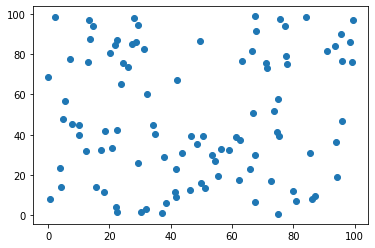

In [91]:
# Code to test the function. Random 2D data is generated in this simple case.
data = 100 * np.random.rand(100, 2)
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4: "orange", 5: 'purple', 6: 'black', 7: 'pink'}
plt.scatter(data[:, 0], data[:, 1])

In [92]:
# If the function is correctly fixed, distinct clusters should be seen.

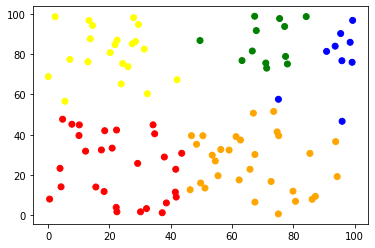

In [94]:
labels = k_means_kernelized(data, 5, 1000)
color_labels = np.vectorize(colors.get)(labels)
color_labels
plt.scatter(data[:, 0], data[:, 1], c = color_labels)


Question: Try the kernelized clustering with different parameters. What happens when:
        
<ul>    
<li>The number of clusters is reduced from 5 to 3?</li>
<li>An RBF kernel is used instead of a linear one?</li>
<li>max_iter is reduced to 100 or increased to 10000?</li>
    
</ul>